In [140]:
import pymysql.cursors
import pandas as pd

conn = pymysql.connect(host='horusa', 
                       user='root', 
                       password='root', 
                       db='zio', 
                       charset='utf8mb4', 
                       autocommit=True, 
                       cursorclass=pymysql.cursors.DictCursor)

def get_investors_volume() :
    cur = conn.cursor()
    sql = "select DATEON, PERSONAL, FOREIGNER, COMPANY, FINANCE, INSURANCE, TOOSIN, BANK, ETC_FIN, GOV_FUND, ETC_FUND from CRAWL_INVESTOR_DAILY_VOLUME where TYPE_CODE='02'"
    cur.execute(sql)
    result = cur.fetchall()
    cur.close()
    df = pd.DataFrame(result)
    df = df.set_index('DATEON')
    return df

def exec_query(sql) -> pd.DataFrame :
    cur = conn.cursor()
    cur.execute(sql)
    result = cur.fetchall()
    # print(result.count())
    cur.close()
    df = pd.DataFrame(result)
    return df

# def end_price(sql = "select * from CRWAL_INVESTOR_STOCK_TYPE") :
#     return exec_query(sql)

def get_daily_kosdaq() :
    sql = 'select * from CRAWL_MARKET_DAILY_DATA'
    return exec_query(sql)

def get_daily_investors_volume() :
    sql = "select DATEON, PERSONAL, FOREIGNER, COMPANY, FINANCE, INSURANCE, TOOSIN, BANK, ETC_FIN, GOV_FUND, ETC_FUND from CRAWL_INVESTOR_DAILY_VOLUME where TYPE_CODE='02'"
    return exec_query(sql)

# get_investors_volume()

#end_price()
get_daily_kosdaq()

# from pycaret.datasets import get_data
# get_data('insurance')

,TYPE_CODE,DATEON,CLOSING_PRICE,UP_DOWN_PER,VOLUME,VOLUME_AMT
0,KOSDAQ,1996.07.04,1018.40,1.30,235.0,5247.0
1,KOSDAQ,1996.07.05,1037.80,1.90,59.0,894.0
2,KOSDAQ,1996.07.06,1048.80,1.06,34.0,338.0
3,KOSDAQ,1996.07.08,1048.20,-0.06,39.0,822.0
4,KOSDAQ,1996.07.09,1060.10,1.14,45.0,589.0
...,...,...,...,...,...,...
7047,KOSDAQ,2024.08.19,777.47,-1.13,1135630.0,7653030.0
7048,KOSDAQ,2024.08.20,787.44,1.28,997056.0,7990590.0
7049,KOSDAQ,2024.08.21,779.87,-0.96,1073930.0,8370580.0
7050,KOSDAQ,2024.08.22,773.47,-0.82,950992.0,9216820.0


In [141]:
investors_volume = get_daily_investors_volume()
# investors_volume = investors_volume.sort_value(by=['DATEON'], axis=0, ascending=True)
# investors_volume.reset_index()
investors_volume = investors_volume.set_index('DATEON')
investors_volume.sort_index(ascending=False, inplace=True)

daily_kosdaq = get_daily_kosdaq()
daily_kosdaq['DATEON'] = daily_kosdaq['DATEON'].str[2:]
daily_kosdaq.set_index('DATEON').drop(labels = ['TYPE_CODE'], axis=1)

import pandas as pd

merged = pd.merge(left=investors_volume, right=daily_kosdaq, how='inner', on='DATEON')

merged.set_index('DATEON')
merged.sort_index(ascending=False, inplace=True)
merged = merged.set_index('DATEON')
merged = merged.drop(labels = ['TYPE_CODE'], axis=1)
merged

,PERSONAL,FOREIGNER,COMPANY,FINANCE,INSURANCE,TOOSIN,BANK,ETC_FIN,GOV_FUND,ETC_FUND,CLOSING_PRICE,UP_DOWN_PER,VOLUME,VOLUME_AMT
DATEON,,,,,,,,,,,,,,
05.01.19,380.0,-250.0,-130.0,46.0,9.0,-98.0,-20.0,-35.0,-33.0,0.0,455.59,1.46,626990.0,1779610.0
05.01.20,323.0,-185.0,-138.0,6.0,13.0,5.0,-45.0,7.0,-124.0,0.0,450.63,-1.09,709356.0,1847210.0
05.01.21,235.0,-177.0,-58.0,3.0,-17.0,-49.0,24.0,-2.0,-17.0,0.0,460.62,2.22,607820.0,1587980.0
05.01.24,321.0,-124.0,-196.0,-33.0,12.0,-48.0,22.0,-15.0,-135.0,0.0,472.75,2.63,603670.0,1756330.0
05.01.25,275.0,-76.0,-199.0,-24.0,-17.0,4.0,-34.0,-11.0,-117.0,0.0,467.29,-1.15,691510.0,1931120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24.08.19,1394.0,-1130.0,-134.0,-59.0,31.0,-43.0,0.0,-54.0,-8.0,-130.0,777.47,-1.13,1135630.0,7653030.0
24.08.20,-1106.0,1005.0,156.0,218.0,25.0,-204.0,-5.0,-54.0,176.0,-55.0,787.44,1.28,997056.0,7990590.0
24.08.21,3639.0,-3343.0,-47.0,276.0,35.0,-414.0,-4.0,4.0,57.0,-249.0,779.87,-0.96,1073930.0,8370580.0


In [142]:
def create_ex_columns(df , name: str) :
    # print(name + ' newly added ..')
    df[name + '_SUM_D5'] = df[name].rolling(5).sum().shift(1)
    df[name + '_AVG_D5'] = df[name].rolling(5).mean().shift(1)
    df[name + '_STD_D5'] = df[name].rolling(5).std().shift(1)
    df[name + '_SUM_D10'] = df[name].rolling(10).sum().shift(1)
    df[name + '_AVG_D10'] = df[name].rolling(10).mean().shift(1)
    df[name + '_STD_D10'] = df[name].rolling(10).std().shift(1)
    df[name + '_SUM_D20'] = df[name].rolling(20).sum().shift(1)
    df[name + '_AVG_D20'] = df[name].rolling(20).mean().shift(1)
    df[name + '_STD_D20'] = df[name].rolling(20).std().shift(1)

feature_cols = ['PERSONAL', 'FOREIGNER', 'COMPANY', 'FINANCE', 'INSURANCE', 'TOOSIN', 'BANK', 'ETC_FIN', 'GOV_FUND', 'ETC_FUND',
                'UP_DOWN_PER', 'VOLUME', 'VOLUME_AMT']   #'CLOSING_PRICE',

for col in feature_cols:
    create_ex_columns(merged, col)
    


# merged.sort_index(ascending=True, inplace=False)

merged['PRED_OUT_D3'] = merged['CLOSING_PRICE'].rolling(3).mean().shift(-2)  # merged['PRED_OUT'] = merged['CLOSING_PRICE'].shift(1)
# merged[['DATEON', 'CLOSING_PRICE', 'PRED_OUT_D3', 'VOLUME_AMT', 'VOLUME_AMT_SUM_D5']]

merged = merged.reset_index()
merged = merged.set_index('DATEON')

merged = merged.drop(['CLOSING_PRICE'], axis=1)

today = merged.tail(1)

merged = merged.dropna()
# merged.sort_index(ascending=True, inplace=True)
merged                      

,PERSONAL,FOREIGNER,COMPANY,FINANCE,INSURANCE,TOOSIN,BANK,ETC_FIN,GOV_FUND,ETC_FUND,...,VOLUME_AMT_SUM_D5,VOLUME_AMT_AVG_D5,VOLUME_AMT_STD_D5,VOLUME_AMT_SUM_D10,VOLUME_AMT_AVG_D10,VOLUME_AMT_STD_D10,VOLUME_AMT_SUM_D20,VOLUME_AMT_AVG_D20,VOLUME_AMT_STD_D20,PRED_OUT_D3
DATEON,,,,,,,,,,,,,,,,,,,,,
05.02.21,256.0,-39.0,-217.0,22.0,-9.0,-73.0,4.0,4.0,-165.0,0.0,...,10401950.0,2080390.0,97874.845338,17713470.0,1771347.0,342006.147900,36084960.0,1804248.0,274974.119712,497.906667
05.02.22,92.0,61.0,-153.0,-6.0,-8.0,-2.0,-13.0,-10.0,-114.0,0.0,...,10097820.0,2019564.0,217047.072037,17801860.0,1780186.0,337122.509654,35956460.0,1797823.0,277073.348375,494.240000
05.02.23,170.0,12.0,-182.0,1.0,-12.0,-86.0,-13.0,-4.0,-69.0,0.0,...,9678710.0,1935742.0,236701.654346,18041870.0,1804187.0,322019.293006,35834790.0,1791739.5,277267.564495,494.253333
05.02.24,-251.0,182.0,70.0,-39.0,-15.0,71.0,-21.0,2.0,73.0,0.0,...,9064220.0,1812844.0,221637.685266,18275730.0,1827573.0,293011.988153,35836330.0,1791816.5,277208.207695,496.953333
05.02.25,-351.0,310.0,41.0,-15.0,45.0,47.0,-6.0,20.0,-50.0,0.0,...,8803650.0,1760730.0,169233.910314,18771990.0,1877199.0,232869.410445,35893720.0,1794686.0,277118.558029,497.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24.08.14,-807.0,828.0,8.0,-84.0,22.0,67.0,-2.0,-47.0,52.0,-29.0,...,36409520.0,7281904.0,299294.849739,73206260.0,7320626.0,884139.322935,139695330.0,6984766.5,856192.718912,780.210000
24.08.16,-1344.0,1010.0,659.0,9.0,22.0,427.0,-14.0,-43.0,258.0,-325.0,...,36766580.0,7353316.0,352779.311440,74176480.0,7417648.0,864066.669763,139836740.0,6991837.0,861673.169791,783.746667
24.08.19,1394.0,-1130.0,-134.0,-59.0,31.0,-43.0,0.0,-54.0,-8.0,-130.0,...,37597010.0,7519402.0,431574.251398,76096150.0,7609615.0,738114.304521,140874170.0,7043708.5,890586.053275,781.593333


In [144]:
today = today.drop('PRED_OUT_D3', axis=1)
today

,PERSONAL,FOREIGNER,COMPANY,FINANCE,INSURANCE,TOOSIN,BANK,ETC_FIN,GOV_FUND,ETC_FUND,...,VOLUME_STD_D20,VOLUME_AMT_SUM_D5,VOLUME_AMT_AVG_D5,VOLUME_AMT_STD_D5,VOLUME_AMT_SUM_D10,VOLUME_AMT_AVG_D10,VOLUME_AMT_STD_D10,VOLUME_AMT_SUM_D20,VOLUME_AMT_AVG_D20,VOLUME_AMT_STD_D20
DATEON,,,,,,,,,,,,,,,,,,,,,
24.08.23,-595.0,1126.0,-99.0,59.0,36.0,-153.0,-7.0,-179.0,145.0,-431.0,...,160893.821488,41231440.0,8246288.0,598992.583318,77998020.0,7799802.0,660511.494707,146673490.0,7333674.5,1.042908e+06


In [126]:
train = merged.sample(frac=0.95, random_state=786)
test = merged.drop(train.index)
# train.reset_index(inplace=True, drop=False)
# test.reset_index(inplace=True, drop=False)

# train.sort_index(ascending=False)
test.sort_index(ascending=False)

,PERSONAL,FOREIGNER,COMPANY,FINANCE,INSURANCE,TOOSIN,BANK,ETC_FIN,GOV_FUND,ETC_FUND,...,VOLUME_AMT_SUM_D5,VOLUME_AMT_AVG_D5,VOLUME_AMT_STD_D5,VOLUME_AMT_SUM_D10,VOLUME_AMT_AVG_D10,VOLUME_AMT_STD_D10,VOLUME_AMT_SUM_D20,VOLUME_AMT_AVG_D20,VOLUME_AMT_STD_D20,PRED_OUT_D3
DATEON,,,,,,,,,,,,,,,,,,,,,
24.07.22,2592.0,-1809.0,-869.0,123.0,-33.0,-580.0,-20.0,-5.0,-354.0,86.0,...,35258620.0,7051724.0,4.380805e+05,75892760.0,7589276.0,7.284896e+05,157369890.0,7868494.5,8.710559e+05,812.110000
24.06.18,196.0,-80.0,-10.0,-282.0,6.0,-47.0,3.0,-17.0,327.0,-106.0,...,49293140.0,9858628.0,8.244546e+05,94020870.0,9402087.0,7.959835e+05,189361650.0,9468082.5,7.938927e+05,859.210000
24.04.02,4769.0,-2284.0,-2370.0,-766.0,-80.0,-1246.0,3.0,1.0,-281.0,-115.0,...,60155400.0,12031080.0,1.279590e+06,109434160.0,10943416.0,1.469203e+06,222856800.0,11142840.0,1.365087e+06,884.816667
23.12.07,1664.0,-1559.0,-24.0,-123.0,63.0,-21.0,-1.0,-26.0,83.0,-81.0,...,45093210.0,9018642.0,9.301937e+05,85803400.0,8580340.0,9.339563e+05,154042170.0,7702108.5,1.193621e+06,826.273333
23.09.08,-561.0,-481.0,1285.0,1005.0,-112.0,363.0,-30.0,-32.0,91.0,-243.0,...,68271000.0,13654200.0,6.964886e+05,130443810.0,13044381.0,2.000869e+06,247145010.0,12357250.5,1.664097e+06,908.256667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05.05.16,-97.0,84.0,13.0,15.0,5.0,40.0,12.0,-11.0,-48.0,0.0,...,5456120.0,1091224.0,8.664682e+04,10086816.0,1008681.6,1.371056e+05,19476970.0,973848.5,1.193123e+05,435.363333
05.03.18,25.0,25.0,-50.0,-7.0,20.0,18.0,-38.0,-11.0,-32.0,0.0,...,6603440.0,1320688.0,8.855177e+04,13059550.0,1305955.0,1.157575e+05,30024120.0,1501206.0,2.678793e+05,463.193333
05.03.11,-114.0,-20.0,134.0,3.0,4.0,123.0,26.0,-14.0,-9.0,0.0,...,6456110.0,1291222.0,1.475313e+05,14356460.0,1435646.0,2.221268e+05,32632190.0,1631609.5,3.232077e+05,488.916667


In [127]:
from pycaret.regression import *

s = setup(data = train, target='PRED_OUT_D3', session_id=123, normalize=True, normalize_method='zscore')

,Description,Value
0,Session id,123
1,Target,PRED_OUT_D3
2,Target type,Regression
3,Original data shape,"(4581, 131)"
4,Transformed data shape,"(4581, 131)"
5,Transformed train set shape,"(3206, 131)"
6,Transformed test set shape,"(1375, 131)"
7,Numeric features,130
8,Preprocess,True
9,Imputation type,simple


In [128]:
best = compare_models(include=['et', 'rf', 'lightgbm'])


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:08:49
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,8.9828,198.0348,13.9883,0.9920,0.0214,0.0137,0.6150
lightgbm,Light Gradient Boosting Machine,14.6409,452.3623,21.1699,0.9817,0.0324,0.0226,0.4080
rf,Random Forest Regressor,14.1042,521.8116,22.6886,0.9788,0.0344,0.0215,2.1640


In [129]:
evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [130]:
pred_holdout = predict_model(best)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,8.5142,176.9873,13.3037,0.9926,0.0212,0.0133


In [146]:
predictions = predict_model(best, data = today)
predictions

,PERSONAL,FOREIGNER,COMPANY,FINANCE,INSURANCE,TOOSIN,BANK,ETC_FIN,GOV_FUND,ETC_FUND,...,VOLUME_AMT_SUM_D5,VOLUME_AMT_AVG_D5,VOLUME_AMT_STD_D5,VOLUME_AMT_SUM_D10,VOLUME_AMT_AVG_D10,VOLUME_AMT_STD_D10,VOLUME_AMT_SUM_D20,VOLUME_AMT_AVG_D20,VOLUME_AMT_STD_D20,prediction_label
DATEON,,,,,,,,,,,,,,,,,,,,,
24.08.23,-595.0,1126.0,-99.0,59.0,36.0,-153.0,-7.0,-179.0,145.0,-431.0,...,41231440.0,8246288.0,598992.5625,77998016.0,7799802.0,660511.5,146673488.0,7333674.5,1.042908e+06,778.222401


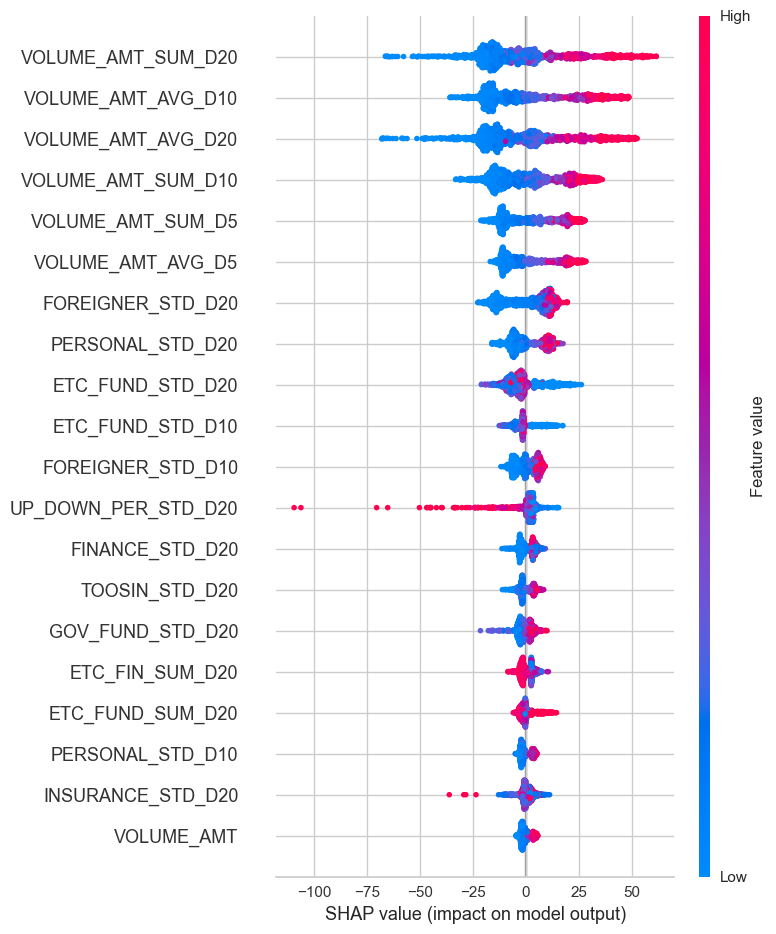

In [131]:
interpret_model(best)